# Micro Credit Defaulter Project

## Data Description

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days.

In this dataset the target variable is label.Our aim is to predict the target variable label,it contains two classes 0 and 1.
0 denotes the failure of payback within 5 days and 1 denotes the success of payback by the user within 5 days.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df=pd.read_csv("Micro_credit.csv")
pd.set_option('display.max_columns',None)
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                31

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
#Dimension of the dataset
df.shape

(209593, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
#Statistical Summary
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

In [8]:
#Checking the null values of the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* No null values in the dataset

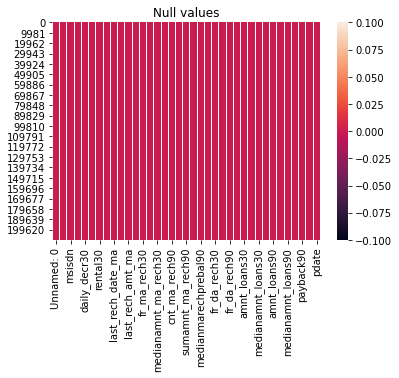

In [9]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

## EDA

In [10]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [11]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
43430I70786    6
43096I88688    6
55809I89238    6
              ..
26297I75360    1
35077I82737    1
27560I82737    1
44634I70788    1
57190I90843    1
Name: msisdn, Length: 186243, dtype: int64

* These mobile numbers contains the letter I,so we have to remove it.

In [12]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

* All numbers are under the telecom circle UPW

In [13]:
import datetime as dt

In [14]:
#Extracting day
df['Day']=pd.to_datetime(df['pdate']).dt.day

#Extracting month
df['month']=pd.to_datetime(df['pdate']).dt.month

#Extracting year
df['year']=pd.to_datetime(df['pdate']).dt.year

#Remove column pdate
df.drop('pdate',axis=1,inplace=True)



In [15]:
import re
df['msisdn']=df['msisdn'].apply(lambda x: re.sub('I','',str(x)))

In [16]:
df

Unnamed: 0  label      msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  2140870789   272.0   3055.050000   3065.150000   
1                2      1  7646270374   712.0  12122.000000  12124.750000   
2                3      1  1794370372   535.0   1398.000000   1398.000000   
3                4      1  5577370781   241.0     21.228000     21.228000   
4                5      1  0381382730   947.0    150.619333    150.619333   
...            ...    ...         ...     ...           ...           ...   
209588      209589      1  2275885348   404.0    151.872333    151.872333   
209589      209590      1  9558384455  1075.0     36.936000     36.936000   
209590      209591      1  2855685350  1013.0  11843.111667  11904.350000   
209591      209592      1  5971282733  1732.0  12488.228333  12574.370000   
209592      209593      1  6506185339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                3178.0   
2095

## Data Visualization

### Univariate Analysis

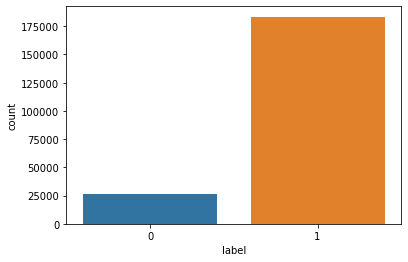

In [17]:
sns.countplot(df['label'])

In [18]:
df.hist(bins=50,figsize=(15,15))
plt.show()

### Bivariate Analysis

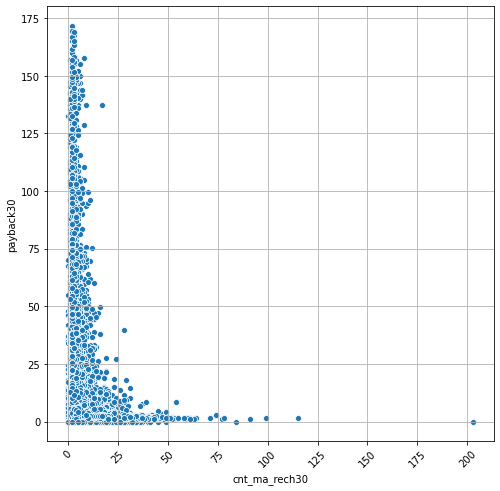

In [19]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.scatterplot(df['cnt_ma_rech30'],df['payback30'],data=df)
plt.xlabel('cnt_ma_rech30')
plt.ylabel('payback30')
plt.grid(True)
plt.show()

In [20]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.scatterplot(df['cnt_ma_rech90'],df['payback90'],data=df)
plt.xlabel('cnt_ma_rech90')
plt.ylabel('payback90')
plt.grid(True)
plt.show()

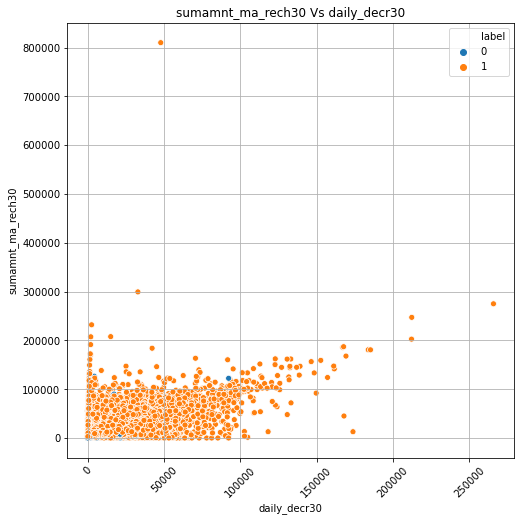

In [21]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.scatterplot(df['daily_decr30'],df['sumamnt_ma_rech30'],hue='label',data=df)
plt.title('sumamnt_ma_rech30 Vs daily_decr30')
plt.xlabel('daily_decr30')
plt.ylabel('sumamnt_ma_rech30')
plt.grid(True)
plt.show()

* There is positive relationship between these two variables.Blue dots denotes the failure of payback and orange dot denotes the success of payback

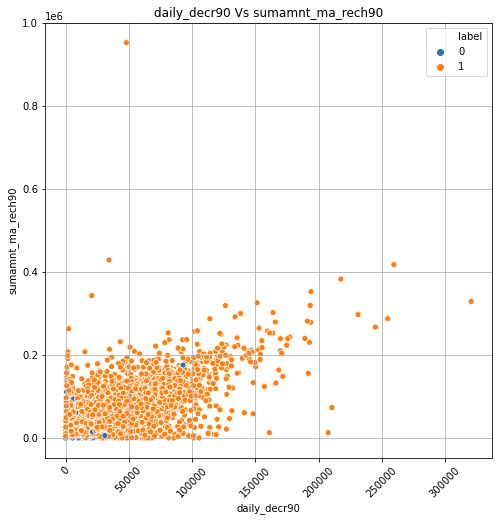

In [22]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.scatterplot(df['daily_decr90'],df['sumamnt_ma_rech90'],hue='label',data=df)
plt.title('daily_decr90 Vs sumamnt_ma_rech90')
plt.xlabel('daily_decr90')
plt.ylabel('sumamnt_ma_rech90')
plt.grid(True)
plt.show()

* There is positive relationship between the variables daily_decr90 and sumamnt_na_rech90.As the amount spent from the mail account increases the sum of main account recharge is also increases

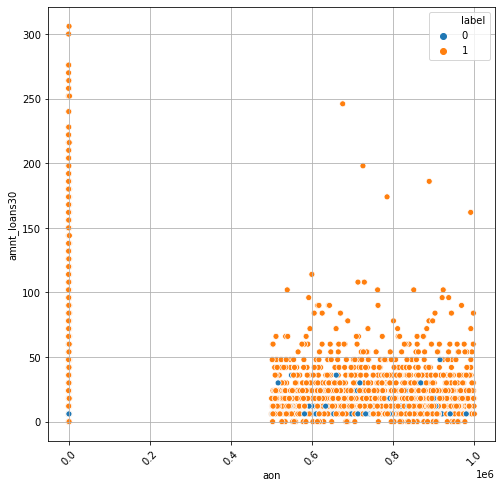

In [23]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
sns.scatterplot(df['aon'],df['amnt_loans30'],hue='label',data=df)
plt.xlabel('aon')
plt.ylabel('amnt_loans30')
plt.grid(True)
plt.show()

* Since data pints are spreaded.so we can't derive any observation from this plot,but at a purticular pint amount of loan over 30 days is maximum.

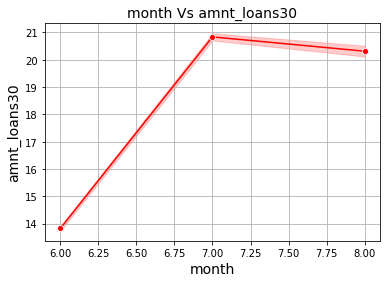

In [24]:
sns.lineplot(df['month'], df['amnt_loans30'], color='red', marker='o')
plt.title('month Vs amnt_loans30', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('amnt_loans30', fontsize=14)
plt.grid(True)
plt.show()

* From this line plot it is clear that in the 7th month (July) amount of loans over30 days is maximum

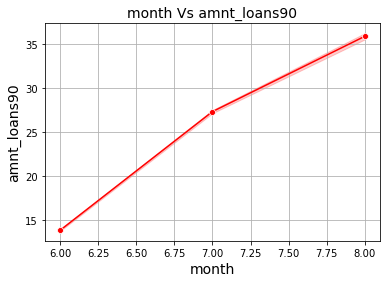

In [25]:
sns.lineplot(df['month'], df['amnt_loans90'], color='red', marker='o')
plt.title('month Vs amnt_loans90', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('amnt_loans90', fontsize=14)
plt.grid(True)
plt.show()

* From the line plot of month Vs amnt_loans90 we can observe that amountof loans over 90 days is maximum in the month August.

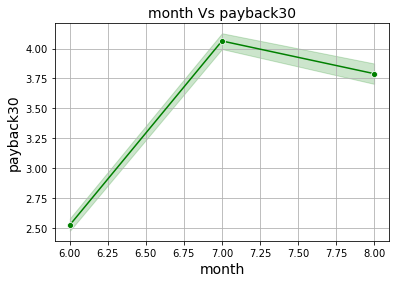

In [26]:
sns.lineplot(df['month'], df['payback30'], color='green', marker='o')
plt.title('month Vs payback30', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('payback30', fontsize=14)
plt.grid(True)
plt.show()

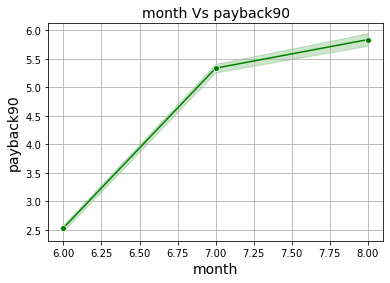

In [27]:
sns.lineplot(df['month'], df['payback90'], color='green', marker='o')
plt.title('month Vs payback90', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.ylabel('payback90', fontsize=14)
plt.grid(True)
plt.show()

* Pay back over 90 days is maximum in the month August and minimum in the month June.

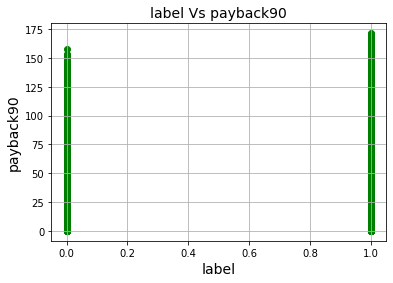

In [28]:
plt.scatter(df['label'], df['payback90'], color='green', marker='o')
plt.title('label Vs payback90', fontsize=14)
plt.xlabel('label', fontsize=14)
plt.ylabel('payback90', fontsize=14)
plt.grid(True)
plt.show()

* Payback over 90 days is maximum among the customers who successfully paid the credit.

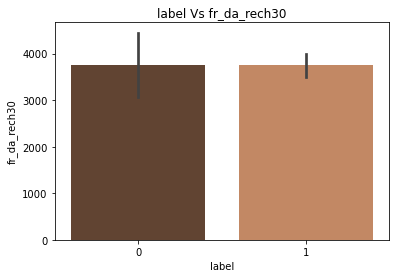

In [29]:
sns.barplot(x='label',y='fr_da_rech30',data=df,palette='copper')
plt.xlabel("label")
plt.ylabel('fr_da_rech30')
plt.title('label Vs fr_da_rech30')
plt.show()

* Frequency of the data recharge over 30 days is almost same for the customers who paid pack the credit and not paid back the credit.

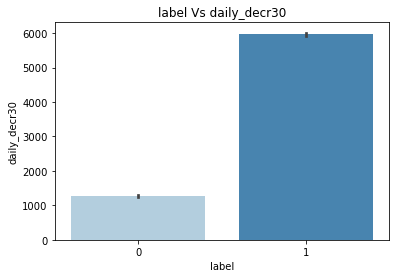

In [30]:
sns.barplot(x='label',y='daily_decr30',data=df,palette='Blues')
plt.title("label Vs daily_decr30")
plt.xlabel('label')
plt.ylabel('daily_decr30')
plt.show()

* Most of the users paid back the credit and for them daily spent amount from main account is also maximum


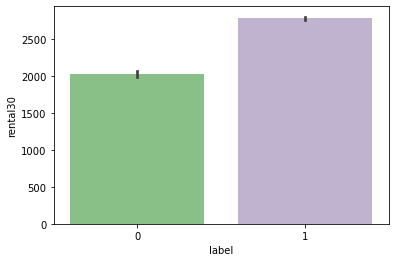

In [31]:
sns.barplot(x='label',y='rental30',data=df,palette='Accent')
plt.xlabel('label')
plt.ylabel('rental30')
plt.show()

* Users whose average main account balance is minimum not paid  the credit on time. The users whose main account balance is maximum are paid the credit on time.

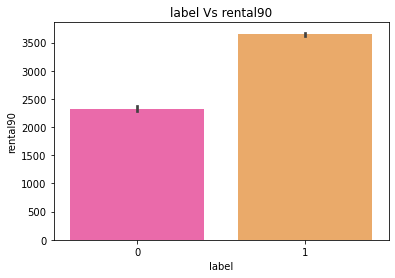

In [32]:
sns.barplot(x='label',y='rental90',data=df,palette='spring')
plt.title('label Vs rental90')
plt.xlabel('label')
plt.ylabel('rental90')
plt.show()

* We can observe that ,users whose main account balance over 90 days is minimum are  not paid the credit on time


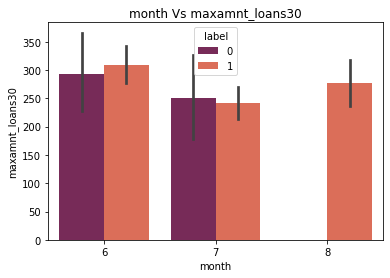

In [33]:
sns.barplot(x='month',y='maxamnt_loans30',hue='label',data=df,palette='rocket')
plt.title('month Vs maxamnt_loans30')
plt.xlabel('month')
plt.ylabel('maxamnt_loans30')
plt.show()

* In the month June users takes the maximum amoumt of loans.among them most of users paid it back and some users are not paid the amount back on time.

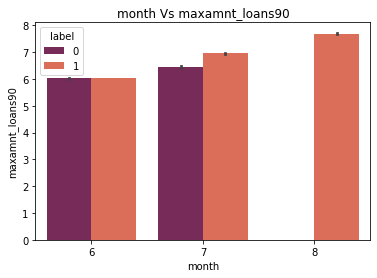

In [34]:
sns.barplot(x='month',y='maxamnt_loans90',hue='label',data=df,palette='rocket')
plt.title('month Vs maxamnt_loans90')
plt.xlabel('month')
plt.ylabel('maxamnt_loans90')
plt.show()

* In the month August the maximum amount of loans over 90 days is maximum and all the users successfully paid the credit back.

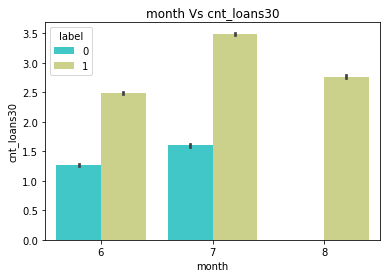

In [35]:
sns.barplot(x='month',y='cnt_loans30',hue='label',data=df,palette='rainbow')
plt.title('month Vs cnt_loans30')
plt.xlabel('month')
plt.ylabel('cnt_loans30')
plt.show()

* We can observe from this graph that the number of loans taken over 30 days is maximum in the month July and most of the customers paid the amount back.


In [36]:
sns.barplot(x='month',y='cnt_loans90',hue='label',data=df,palette='rainbow')
plt.title('month Vs cnt_loans90')
plt.xlabel('month')
plt.ylabel('cnt_loans90')
plt.show()

* The number of times loan taken by the users is maximum in the month August and all the customers successfully paid it back. In the month June and July most of the users paid the loan back but some users not paid it on time.

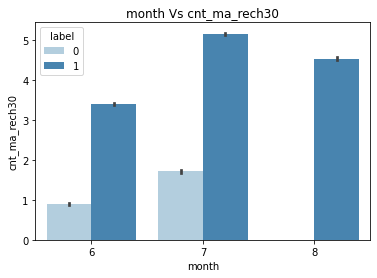

In [37]:
sns.barplot(x='month',y='cnt_ma_rech30',hue='label',data=df,palette='Blues')
plt.title('month Vs cnt_ma_rech30')
plt.xlabel('month')
plt.ylabel('cnt_ma_rech30')
plt.show()

* Number of times the main account recharge made by the user in the last 90 days is maximum in the month July.In this month  most of the users paid the credit back.
* There is no failure in the payment of credit in the month August.S

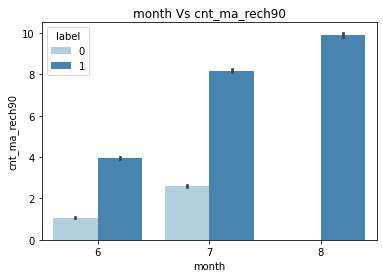

In [38]:
sns.barplot(x='month',y='cnt_ma_rech90',hue='label',data=df,palette='Blues')
plt.title('month Vs cnt_ma_rech90')
plt.xlabel('month')
plt.ylabel('cnt_ma_rech90')
plt.show()

* The number of times the main account got recharged in the past 90 days is maximum in the month August. And in this month there is no credit default.
* Number of times of recharge in the past 90 days is minimum in the month June

In [39]:
sns.barplot(x='month',y='cnt_da_rech30',hue='label',data=df,palette='copper')
plt.title('month Vs cnt_da_rech30')
plt.xlabel('month')
plt.ylabel('cnt_da_rech30')
plt.show()

* The number of times the data account got recharged in the past 30 days is maximum in the month July and most of the users  paid the credit successfully. 
* Number of users who didn’t paid the credit properly is maximum in the month June.


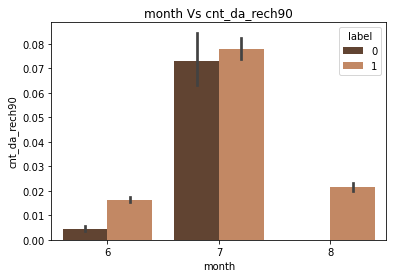

In [40]:
sns.barplot(x='month',y='cnt_da_rech90',hue='label',data=df,palette='copper')
plt.title('month Vs cnt_da_rech90')
plt.xlabel('month')
plt.ylabel('cnt_da_rech90')
plt.show()

* The number of data account recharge in the last 90 days  are maximum in the month July.
* Data recharge is minimum in the month June.
* In the month July there is no credit default.

In [41]:
sns.barplot(x='month',y='sumamnt_ma_rech30',hue='label',data=df,palette='winter')
plt.title('month Vs sumamnt_ma_rech30')
plt.xlabel('month')
plt.ylabel('sumamnt_ma_rech30')
plt.show()

* Total amount of recharge in main account over last 30 days is maximum in the month July. Most of the users Paid the credit successfully.
* There is no credit default in the month August.


In [42]:
sns.barplot(x='month',y='sumamnt_ma_rech90',hue='label',data=df,palette='winter')
plt.title('month Vs sumamnt_ma_rech90')
plt.xlabel('month')
plt.ylabel('sumamnt_ma_rech90')
plt.show()

* The total amount of recharge in main account over last 90 days is maximum in the month August and there is no credit default in this month.
* Total amount of recharge in main account over last 90 days is minimum in the month June and the credit default is also few in number.


In [43]:
sns.barplot(x='month',y='payback30',hue='label',data=df,palette='autumn')
plt.title('month Vs payback30')
plt.xlabel('month')
plt.ylabel('payback30')
plt.show()

* Average payback time in days over last 30 days is maximum in the month July. Most of the users paid their credit on time.

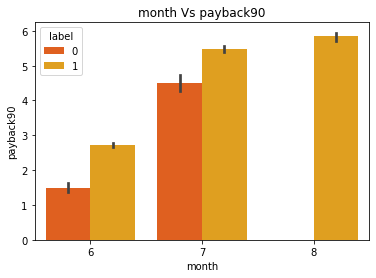

In [44]:
sns.barplot(x='month',y='payback90',hue='label',data=df,palette='autumn')
plt.title('month Vs payback90')
plt.xlabel('month')
plt.ylabel('payback90')
plt.show()

* The average payback time in days over last 90 days is maximum in the month August and there is no credit default in this month. Payback over 90 days is minimum in the month June.


In [45]:
sns.barplot(x='month',y='fr_ma_rech30',hue='label',data=df,palette='cool')
plt.title('month Vs fr_ma_rech30')
plt.xlabel('month')
plt.ylabel('fr_ma_rech30')
plt.show()

* The frequency of the main account recharge over90 days is maximum in the month July.Credit defaulters are maximum in the month July.
* The number of users they paid their credit on time are maximum in the month June and July. 


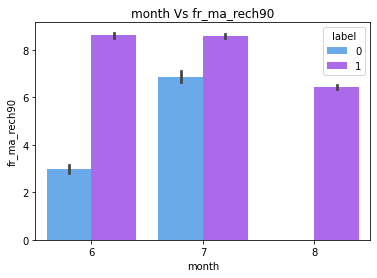

In [46]:
sns.barplot(x='month',y='fr_ma_rech90',hue='label',data=df,palette='cool')
plt.title('month Vs fr_ma_rech90')
plt.xlabel('month')
plt.ylabel('fr_ma_rech90')
plt.show()

* The frequency of the main account recharge over90 days is maximum in the month July.Credit defaulters are maximum in the month July.
* The number of users they paid their credit on time are maximum in the month June and July. 


In [47]:
sns.barplot(x='month',y='fr_da_rech30',hue='label',data=df,palette='magma')
plt.title('month Vs fr_da_rech30')
plt.xlabel('month')
plt.ylabel('fr_da_rech30')
plt.show()

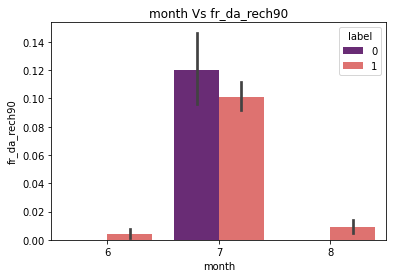

In [48]:
sns.barplot(x='month',y='fr_da_rech90',hue='label',data=df,palette='magma')
plt.title('month Vs fr_da_rech90')
plt.xlabel('month')
plt.ylabel('fr_da_rech90')
plt.show()

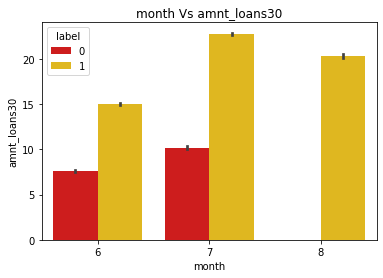

In [49]:
sns.barplot(x='month',y='amnt_loans30',hue='label',data=df,palette='hot')
plt.title('month Vs amnt_loans30')
plt.xlabel('month')
plt.ylabel('amnt_loans30')
plt.show()

* Total amount of loans taken by the user in the last 30 days is maximum for the month July.
* Second most in the month August and there is no credit defaulter in this month.
* The number credit default is minimum in the month  June and in this month amount of loans is  minimum.


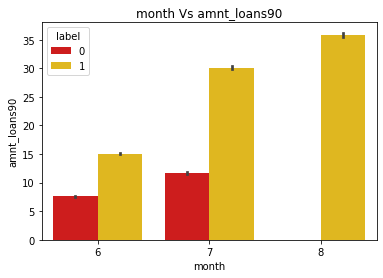

In [50]:
sns.barplot(x='month',y='amnt_loans90',hue='label',data=df,palette='hot')
plt.title('month Vs amnt_loans90')
plt.xlabel('month')
plt.ylabel('amnt_loans90')
plt.show()

* Amount of loans in the last 90 days is maximum in the month August and these users paid the credit successfully.
* The amount of loans taken by the users in the last 90 days is minimum in the month June

## Converting Categorical column into numerical

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['pcircle']=le.fit_transform(df['pcircle'])
df

Unnamed: 0  label      msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  2140870789   272.0   3055.050000   3065.150000   
1                2      1  7646270374   712.0  12122.000000  12124.750000   
2                3      1  1794370372   535.0   1398.000000   1398.000000   
3                4      1  5577370781   241.0     21.228000     21.228000   
4                5      1  0381382730   947.0    150.619333    150.619333   
...            ...    ...         ...     ...           ...           ...   
209588      209589      1  2275885348   404.0    151.872333    151.872333   
209589      209590      1  9558384455  1075.0     36.936000     36.936000   
209590      209591      1  2855685350  1013.0  11843.111667  11904.350000   
209591      209592      1  5971282733  1732.0  12488.228333  12574.370000   
209592      209593      1  6506185339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                3178.0   
2095

In [52]:
df.drop('pcircle',axis=1,inplace=True) # Since only one label is there in this column we are dropping this column

## Correlation Matrix

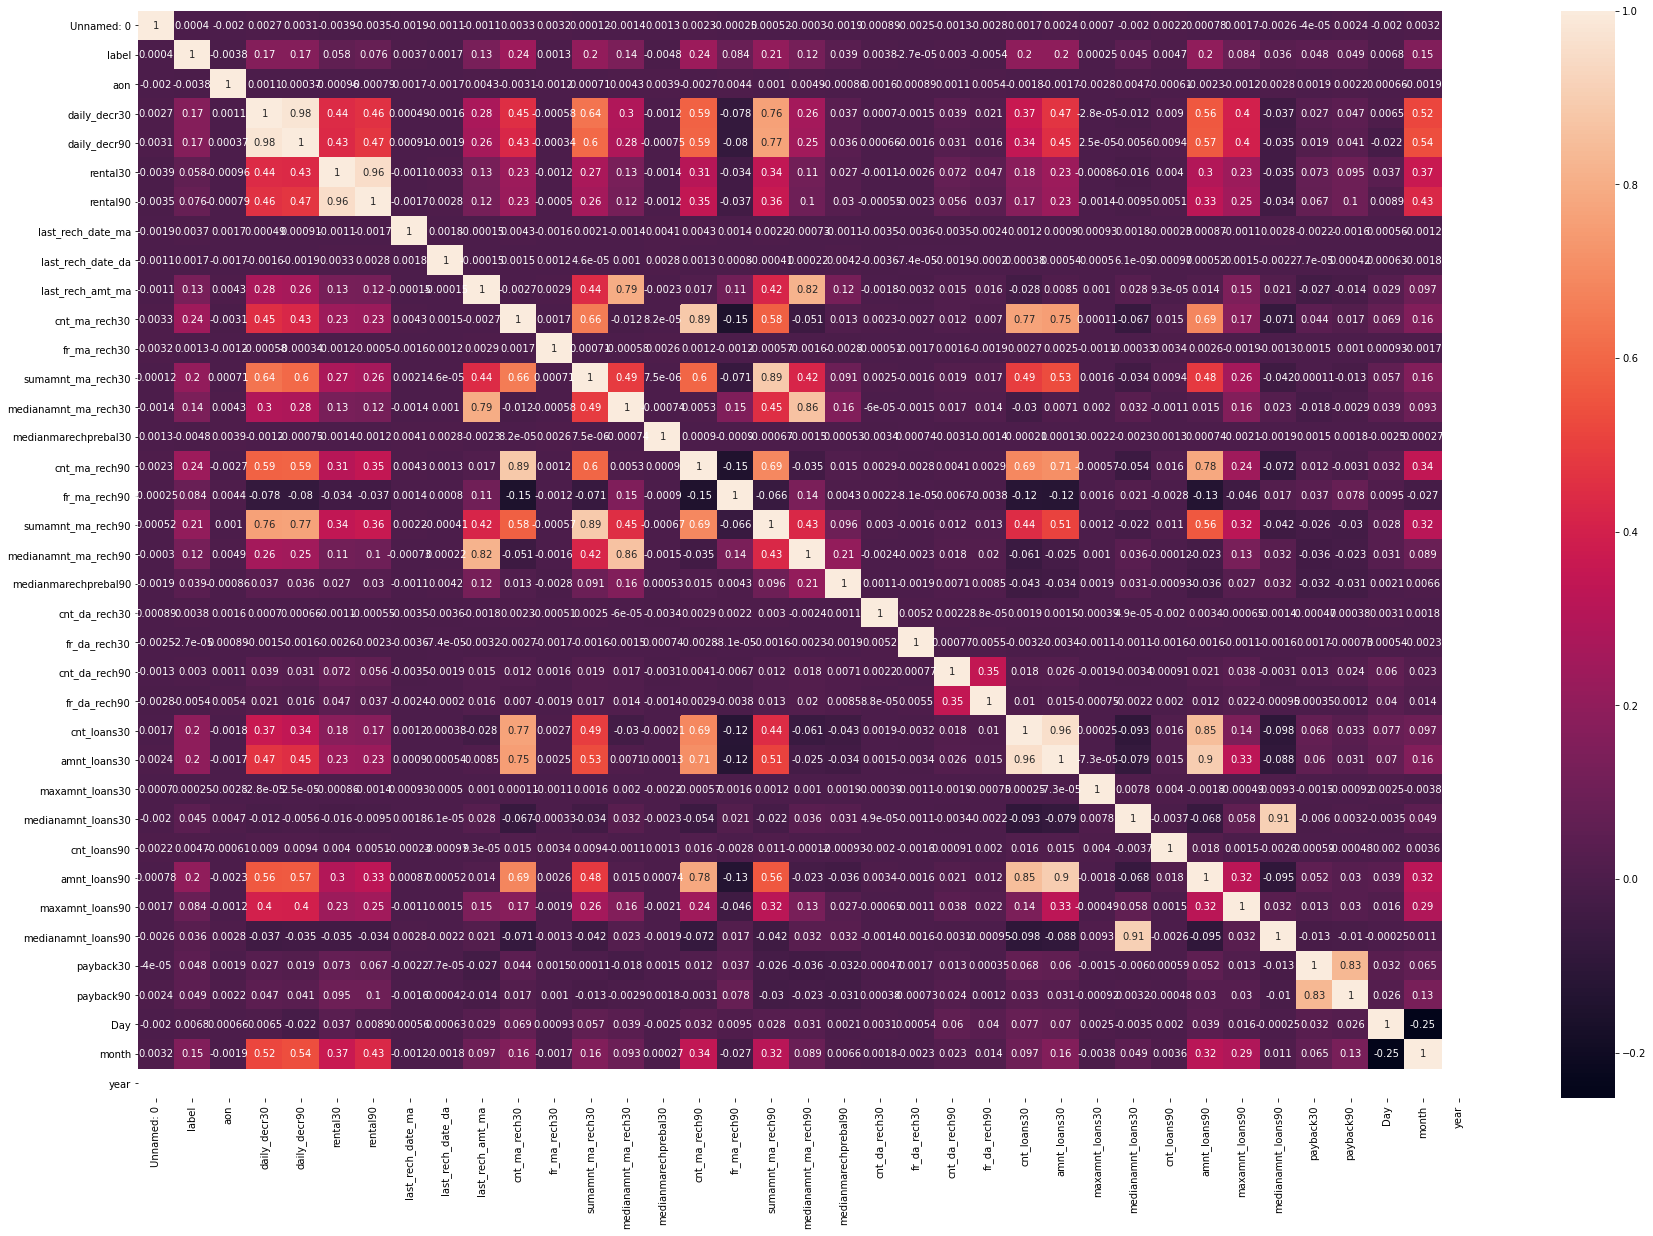

In [53]:
corr_mat=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Conclusions:

* rental 30 and rental 90 have strong correlation with each other.

* daily_decr30 and daily_decr90 are in strong correlation with each other.

* cnt_loans30 and amnt_loans30 are in strong correlation with each other.

* maxamnt_loans30 have very weak correlation with the target variable.

* neither of the independent variables have strong correlation with the target variable.

In [54]:
#correlation table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Now we are going to drop some column from the dataframe.

In [55]:
df.drop('msisdn',axis=1,inplace=True) # Since this variable is not so important for further analysis

In [56]:
df.drop('Unnamed: 0',axis=1,inplace=True)# This variable is not needed as index column is there.

In [57]:
# rental30 have strong correlation with the variable rental90.So we are dropping one of them.
df.drop('rental30',axis=1,inplace=True)

In [58]:
df.drop('maxamnt_loans30',axis=1,inplace=True)# Since this variable have weak correlation with the target variable

In [59]:
df.drop('year',axis=1,inplace=True) # Not important for further analysis

## Detection of outliers

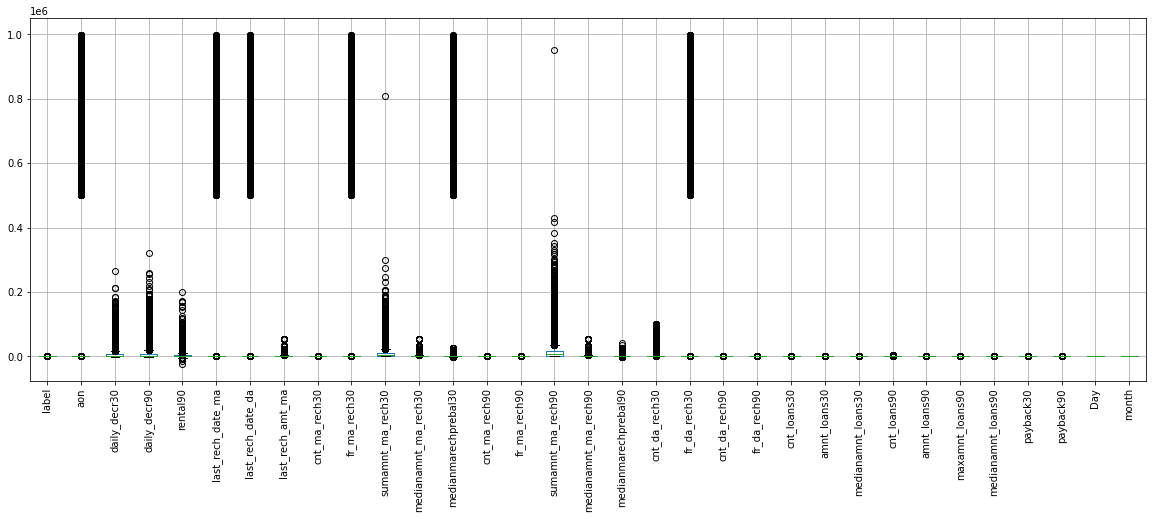

In [60]:
df.iloc[:,0:37].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

## Removal of Outliers

In [61]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 5
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [62]:
out_std(df,'sumamnt_ma_rech30')

The lower bound value is -42993.60741196207
The upper bound value is 58402.60972597065
Total number of outliers are 1078


In [63]:
plt.figure(figsize = (10,5))
sns.distplot(df['sumamnt_ma_rech30'], kde=False)
plt.axvspan(xmin = lower,xmax= df['sumamnt_ma_rech30'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['sumamnt_ma_rech30'].max(),alpha=0.2, color='red')

In [64]:
#Data Frame without outliers
df[(df['sumamnt_ma_rech30'] <upper) | (df['sumamnt_ma_rech30'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [65]:
df=df[(df['sumamnt_ma_rech30'] <upper) & (df['sumamnt_ma_rech30'] >lower)]

In [66]:
out_std(df,'sumamnt_ma_rech90')

The lower bound value is -60324.063144654836
The upper bound value is 83993.11680506296
Total number of outliers are 887


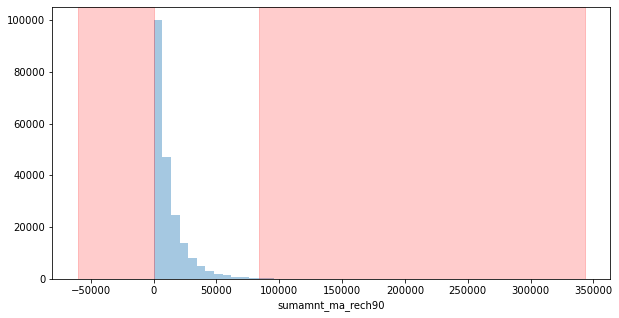

In [67]:
plt.figure(figsize = (10,5))
sns.distplot(df['sumamnt_ma_rech90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['sumamnt_ma_rech90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['sumamnt_ma_rech90'].max(),alpha=0.2, color='red')

In [68]:
#Data Frame without outliers
df[(df['sumamnt_ma_rech90'] < upper) | (df['sumamnt_ma_rech90'] > lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [69]:
df=df[(df['sumamnt_ma_rech90'] < upper) & (df['sumamnt_ma_rech90'] > lower)]

In [70]:
out_std(df,'daily_decr90')

The lower bound value is -40854.47544123214
The upper bound value is 52129.381497335904
Total number of outliers are 878


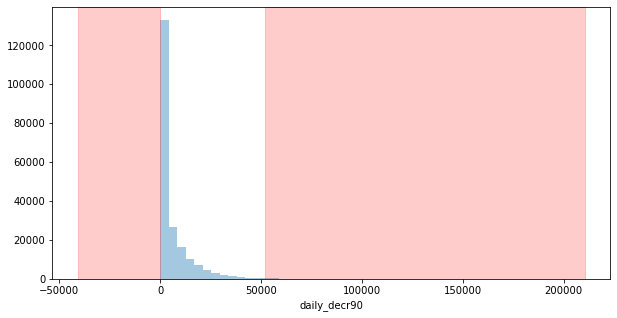

In [71]:
plt.figure(figsize = (10,5))
sns.distplot(df['daily_decr90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['daily_decr90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['daily_decr90'].max(),alpha=0.2, color='red')

In [72]:
#Data Frame without outliers
df[(df['daily_decr90'] <upper) | (df['daily_decr90'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [73]:
df=df[(df['daily_decr90'] <upper) & (df['daily_decr90'] >lower)]

In [74]:
out_std(df,'rental90')

The lower bound value is -24319.472563350217
The upper bound value is 31033.84980291463
Total number of outliers are 1068


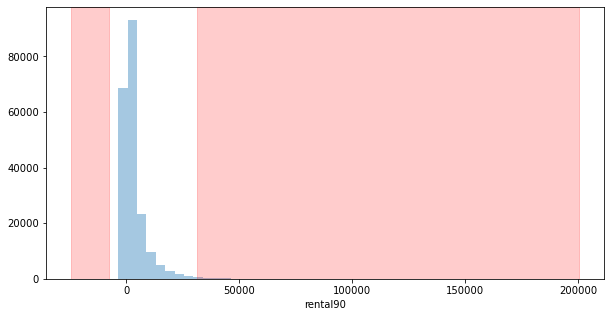

In [75]:
plt.figure(figsize = (10,5))
sns.distplot(df['rental90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['rental90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['rental90'].max(),alpha=0.2, color='red')

In [76]:
#Data Frame without outliers
df[(df['rental90'] <upper) | (df['rental90'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [77]:
df=df[(df['rental90'] <upper)  & (df['rental90'] >lower)]

In [78]:
out_std(df,'last_rech_amt_ma')

The lower bound value is -9274.263137469537
The upper bound value is 13294.399114365911
Total number of outliers are 189


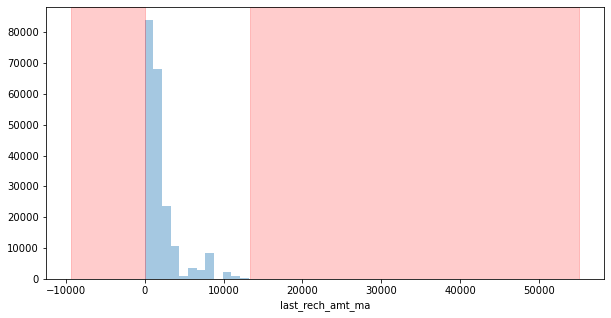

In [79]:
plt.figure(figsize = (10,5))
sns.distplot(df['last_rech_amt_ma'], kde=False)
plt.axvspan(xmin = lower,xmax= df['last_rech_amt_ma'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['last_rech_amt_ma'].max(),alpha=0.2, color='red')

In [80]:
#Data Frame without outliers
df[(df['last_rech_amt_ma'] <upper) | (df['last_rech_amt_ma'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [81]:
df=df[(df['last_rech_amt_ma'] <upper) & (df['last_rech_amt_ma'] >lower)]

In [82]:
out_std(df,'cnt_ma_rech30')

The lower bound value is -15.940849604593442
The upper bound value is 23.648936984698846
Total number of outliers are 699


In [83]:
plt.figure(figsize = (10,5))
sns.distplot(df['cnt_ma_rech30'], kde=False)
plt.axvspan(xmin = lower,xmax= df['cnt_ma_rech30'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['cnt_ma_rech30'].max(),alpha=0.2, color='red')

In [84]:
#Data Frame without outliers
df[(df['cnt_ma_rech30'] <upper) | (df['cnt_ma_rech30'] > lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [85]:
df=df[(df['cnt_ma_rech30'] <upper) & (df['cnt_ma_rech30'] > lower)]

In [86]:
out_std(df,'medianamnt_ma_rech30')

The lower bound value is -7855.05166005634
The upper bound value is 11360.980754658722
Total number of outliers are 597


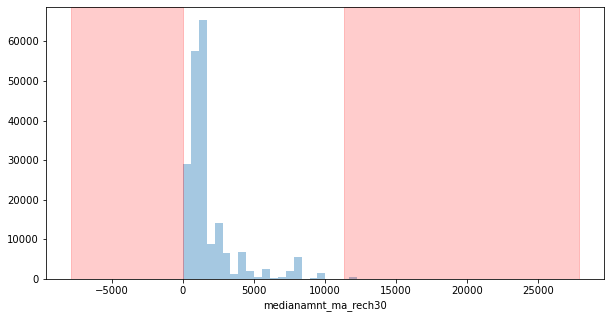

In [87]:
plt.figure(figsize = (10,5))
sns.distplot(df['medianamnt_ma_rech30'], kde=False)
plt.axvspan(xmin = lower,xmax= df['medianamnt_ma_rech30'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['medianamnt_ma_rech30'].max(),alpha=0.2, color='red')

In [88]:
#Data Frame without outliers
df[(df['medianamnt_ma_rech30'] < upper) | (df['medianamnt_ma_rech30'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [89]:
df=df[(df['medianamnt_ma_rech30'] < upper) & (df['medianamnt_ma_rech30'] >lower)]

In [90]:
out_std(df,'cnt_ma_rech90')

The lower bound value is -25.186155799456845
The upper bound value is 37.07769191409124
Total number of outliers are 535


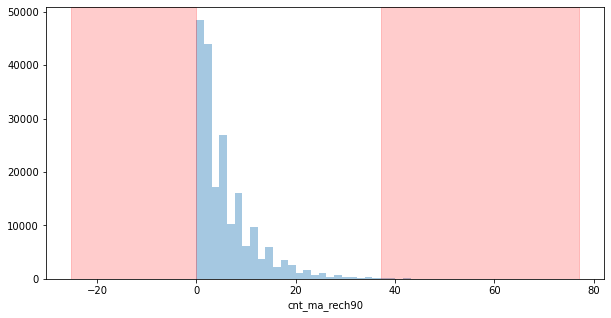

In [91]:
plt.figure(figsize = (10,5))
sns.distplot(df['cnt_ma_rech90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['cnt_ma_rech90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['cnt_ma_rech90'].max(),alpha=0.2, color='red')

In [92]:
#Data Frame without outliers
df[(df['cnt_ma_rech90'] < upper)|(df['cnt_ma_rech90']>lower)]


label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [93]:
df=df[(df['cnt_ma_rech90'] < upper) & (df['cnt_ma_rech90']>lower)]

In [94]:
out_std(df,'medianamnt_ma_rech90')

The lower bound value is -7503.33151071732
The upper bound value is 11062.760122829544
Total number of outliers are 203


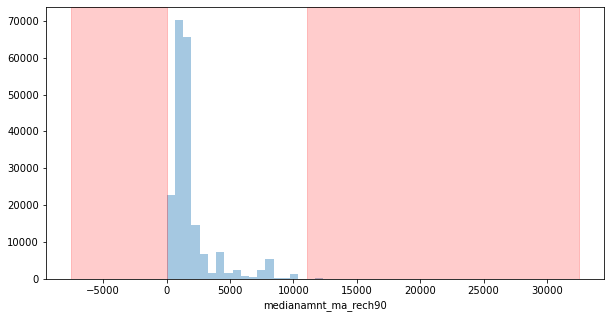

In [95]:
plt.figure(figsize = (10,5))
sns.distplot(df['medianamnt_ma_rech90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['medianamnt_ma_rech90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['medianamnt_ma_rech90'].max(),alpha=0.2, color='red')

In [96]:
#Data Frame without outliers
df[(df['medianamnt_ma_rech90'] < upper) | (df['medianamnt_ma_rech90'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [97]:
df=df[(df['medianamnt_ma_rech90'] < upper) & (df['medianamnt_ma_rech90'] >lower)]

In [98]:
out_std(df,'medianmarechprebal90')

The lower bound value is -1298.9123027159285
The upper bound value is 1471.4940847948742
Total number of outliers are 727


In [99]:
plt.figure(figsize = (10,5))
sns.distplot(df['medianmarechprebal90'], kde=False)
plt.axvspan(xmin = lower,xmax= df['medianmarechprebal90'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df['medianmarechprebal90'].max(),alpha=0.2, color='red')

In [100]:
#Data Frame without outliers
df[(df['medianmarechprebal90'] < upper) | (df['medianmarechprebal90'] >lower)]

label     aon  daily_decr30  daily_decr90  rental90  \
0           0   272.0   3055.050000   3065.150000    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13   
3           1   241.0     21.228000     21.228000    159.42   
4           1   947.0    150.619333    150.619333   1098.90   
...       ...     ...           ...           ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   
209590      1  1013.0  11843.111667  11904.350000   8893.20   
209591      1  1732.0  12488.228333  12574.370000    984.58   
209592      1  1581.0   4489.362000   4534.820000    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
...                      ...                   ...            ...   
209588                3178.0                 91.81   

In [101]:
out_std(df,'aon')

The lower bound value is -369059.75119895703
The upper bound value is 385179.3497614117
Total number of outliers are 2015


In [102]:
df[(df['aon'] < upper) | (df['aon'] >lower)]
df=df[(df['aon'] < upper) & (df['aon'] >lower)]

In [103]:
out_std(df,'last_rech_date_ma')

The lower bound value is -264732.9821753885
The upper bound value is 272171.68746792444
Total number of outliers are 995


In [104]:
df[(df['last_rech_date_ma'] < upper) |(df['last_rech_date_ma'] >lower)]
df=df[(df['last_rech_date_ma'] < upper) & (df['last_rech_date_ma'] >lower)]

In [105]:
out_std(df,'last_rech_date_da')

The lower bound value is -262589.8902364017
The upper bound value is 269992.3314172372
Total number of outliers are 1000


In [106]:
df[(df['last_rech_date_da'] < upper) |(df['last_rech_date_da'] >lower)]
df=df[(df['last_rech_date_da'] < upper) & (df['last_rech_date_da'] >lower)]

In [107]:
df[(df['fr_ma_rech30'] < upper) |(df['fr_ma_rech30'] >lower)]
df=df[(df['fr_ma_rech30'] < upper) & (df['fr_ma_rech30'] >lower)]

In [108]:
out_std(df,'medianmarechprebal30')

The lower bound value is -263986.51371618547
The upper bound value is 271562.608192115
Total number of outliers are 977


In [109]:
df[(df['medianmarechprebal30'] < upper) |(df['medianmarechprebal30'] >lower)]
df=df[(df['medianmarechprebal30'] < upper) & (df['medianmarechprebal30'] >lower)]

In [110]:
out_std(df,'cnt_da_rech30')

The lower bound value is -20840.20545413858
The upper bound value is 21373.67979369052
Total number of outliers are 819


In [111]:
df[(df['cnt_da_rech30'] <upper) | (df['cnt_da_rech30'] > lower)]
df=df[(df['cnt_da_rech30'] <upper) & (df['cnt_da_rech30'] > lower)]

In [112]:
out_std(df,'cnt_da_rech90')

The lower bound value is -1.8669391264722845
The upper bound value is 1.9487062731649867
Total number of outliers are 1100


In [113]:
df[(df['cnt_da_rech90'] <upper) | (df['cnt_da_rech90'] > lower)]
df=df[(df['cnt_da_rech90'] <upper) & (df['cnt_da_rech90'] > lower)]

In [114]:
out_std(df,'cnt_loans90')

The lower bound value is -1108.3927258358387
The upper bound value is 1145.1195500324923
Total number of outliers are 939


In [115]:
df[(df['cnt_loans90'] <upper) | (df['cnt_loans90'] > lower)]
df=df[(df['cnt_loans90'] <upper) & (df['cnt_loans90'] > lower)]

In [116]:
out_std(df,'payback30')

The lower bound value is -40.96046294070498
The upper bound value is 47.804907444188196
Total number of outliers are 1448


In [117]:
df[(df['payback30'] <upper) | (df['payback30'] > lower)]
df=df[(df['payback30'] <upper) & (df['payback30'] > lower)]

In [118]:
out_std(df,'payback90')

The lower bound value is -33.83870074175317
The upper bound value is 41.367011880107555
Total number of outliers are 1202


In [119]:
df[(df['payback90'] <upper) | (df['payback90'] > lower)]
df=df[(df['payback90'] <upper) & (df['payback90'] > lower)]

In [120]:
df.shape

(191967, 33)

In [121]:
#Seperating the independent and target variables as x and y
x=df.drop('label',axis=1)
y=df['label']

In [122]:
x

aon  daily_decr30  daily_decr90  rental90  last_rech_date_ma  \
0        272.0   3055.050000   3065.150000    260.13                2.0   
1        712.0  12122.000000  12124.750000   3691.26               20.0   
2        535.0   1398.000000   1398.000000    900.13                3.0   
3        241.0     21.228000     21.228000    159.42               41.0   
4        947.0    150.619333    150.619333   1098.90                4.0   
...        ...           ...           ...       ...                ...   
209588   404.0    151.872333    151.872333   1089.19                1.0   
209589  1075.0     36.936000     36.936000   1728.36                4.0   
209590  1013.0  11843.111667  11904.350000   8893.20                3.0   
209591  1732.0  12488.228333  12574.370000    984.58                2.0   
209592  1581.0   4489.362000   4534.820000    631.20               13.0   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                     0.0              1539              2          21.0   
1                     0.0              5787              1           0.0   
2                     0.0              1539              1           0.0   
3                     0.0               947              0           0.0   
4                     0.0              2309              7           2.0   
...                   ...               ...            ...           ...   
209588                0.0              4048              3           2.0   
209589                0.0               773              4           1.0   
209590                0.0              1539              5           8.0   
209591               38.0               773              5           4.0   
209592                0.0              7526              2           1.0   

        sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0                  3078.0                1539.0                  7.50   
1                  5787.0                5787.0                 61.04   
2                  1539.0                1539.0                 66.32   
3                     0.0                   0.0                  0.00   
4                 20029.0                2309.0                 29.00   
...                   ...                   ...                   ...   
209588            10404.0                3178.0                 91.81   
209589             3092.0                 773.0                161.30   
209590             9334.0                1539.0                 51.13   
209591            12154.0                 773.0                164.00   
209592             9065.0                4532.5                356.70   

        cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                   2            21               3078                1539.0   
1                   1             0               5787                5787.0   
2                   1             0               1539                1539.0   
3                   1             0                947                 947.0   
4                   8             2              23496                2888.0   
...               ...           ...                ...                   ...   
209588              3             2              10404                3178.0   
209589              6             2               4038                 773.0   
209590             11             5              18592                1539.0   
209591              6             4              17941                2410.5   
209592              3            19              16591                7526.0   

        medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                       7.50            0.0           0.0              0   
1                      61.04            0.0           0.0              0   
2                      66.32            0.0           0.0              0   
3                       2.50            0.0           0

## Distribution of Data along Columns

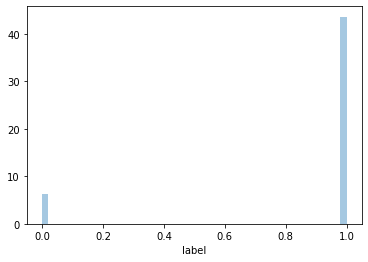

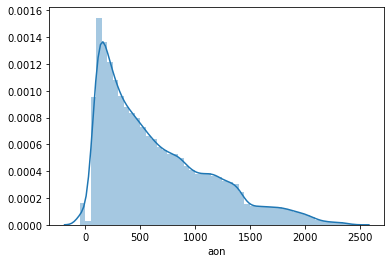

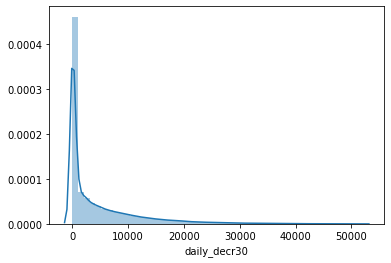

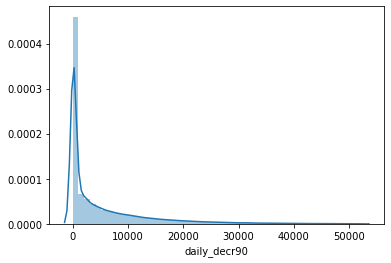

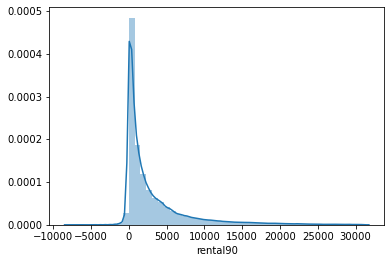

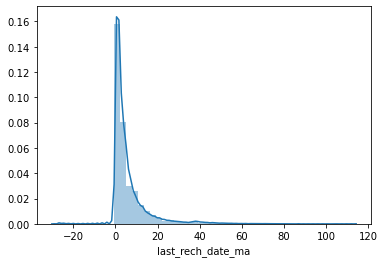

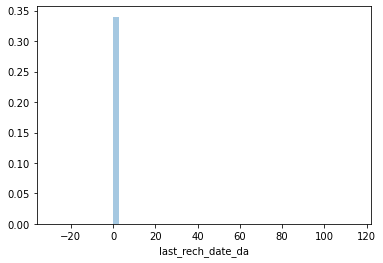

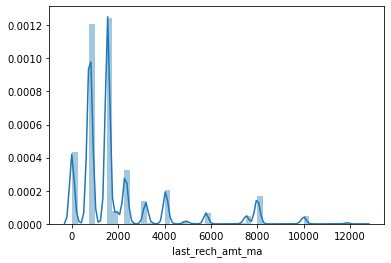

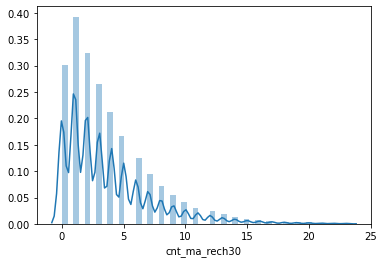

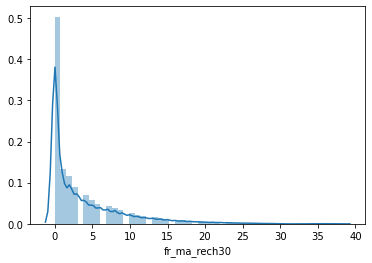

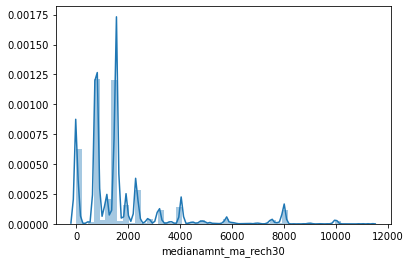

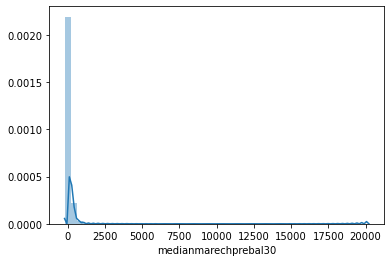

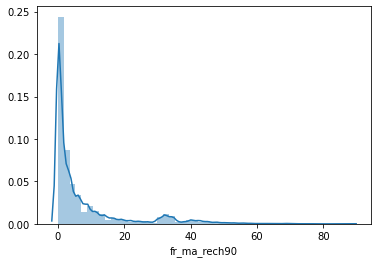

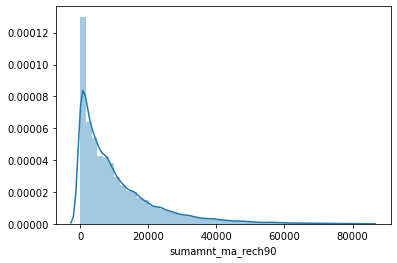

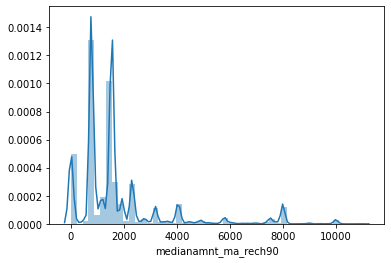

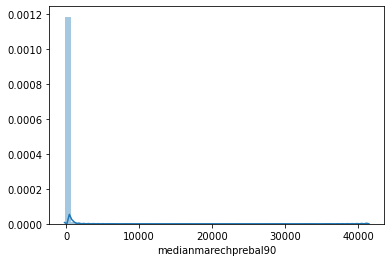

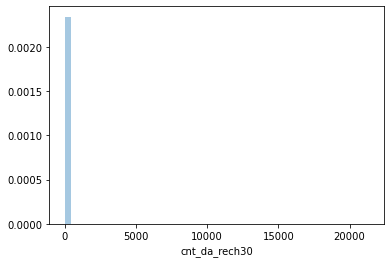

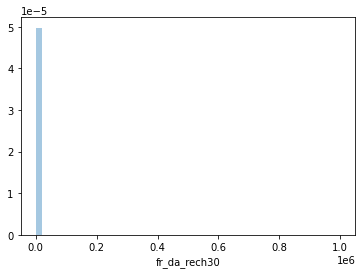

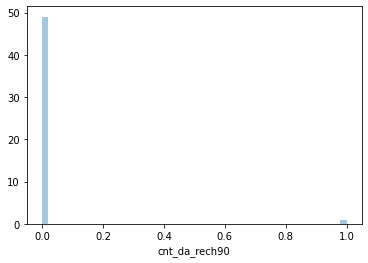

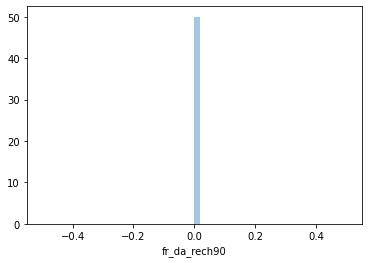

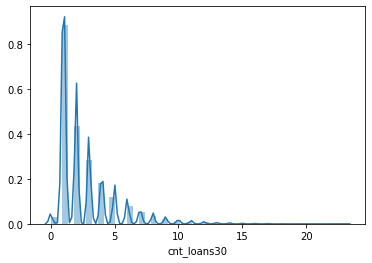

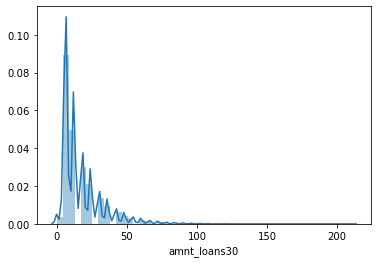

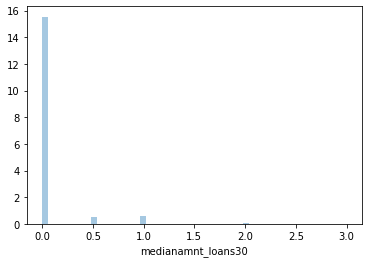

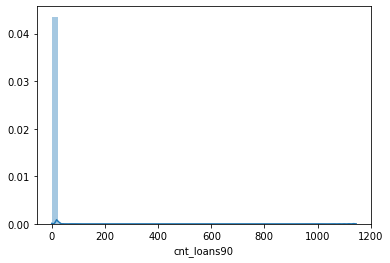

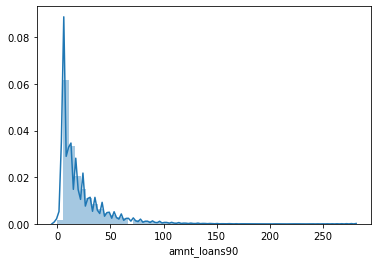

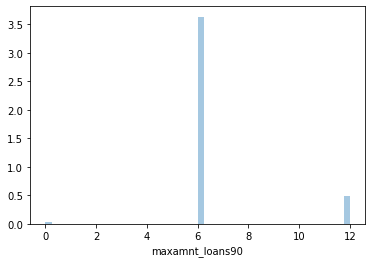

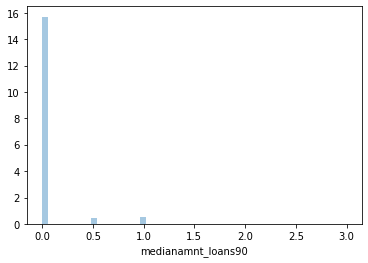

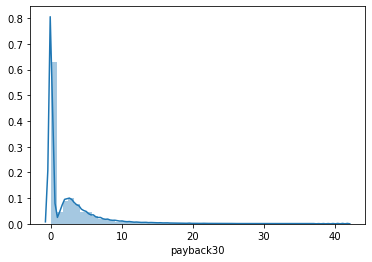

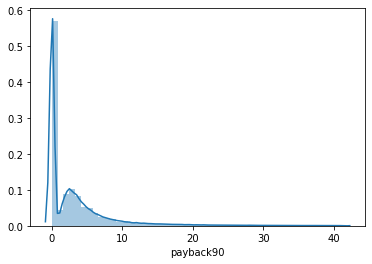

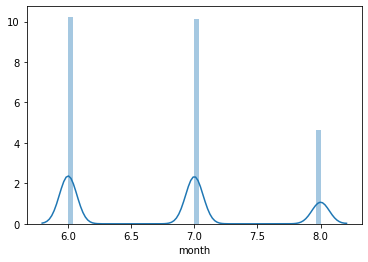

In [123]:
for i in ['label','aon', 'daily_decr30', 'daily_decr90', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90','month']:
    sns.distplot(df[i]) 
    plt.show()

## Checking Skewness

In [124]:
x.skew()

aon                      0.949238
daily_decr30             2.232652
daily_decr90             2.296374
rental90                 2.610911
last_rech_date_ma        3.097393
last_rech_date_da       10.232922
last_rech_amt_ma         2.175518
cnt_ma_rech30            1.632249
fr_ma_rech30             2.017316
sumamnt_ma_rech30        2.046491
medianamnt_ma_rech30     2.354681
medianmarechprebal30    17.376277
cnt_ma_rech90            1.738747
fr_ma_rech90             2.264895
sumamnt_ma_rech90        2.005028
medianamnt_ma_rech90     2.369430
medianmarechprebal90    42.561850
cnt_da_rech30           37.310346
fr_da_rech30            14.715121
cnt_da_rech90            6.893858
fr_da_rech90             0.000000
cnt_loans30              2.100362
amnt_loans30             2.266553
medianamnt_loans30       4.544148
cnt_loans90             66.426851
amnt_loans90             2.442584
maxamnt_loans90          1.767224
medianamnt_loans90       4.886545
payback30                3.375354
payback90     

In [125]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [126]:
df_new.skew()

aon                      0.305106
daily_decr30            -1.547247
daily_decr90            -1.658998
rental90                 0.348404
last_rech_date_ma        0.142672
last_rech_date_da      -57.490047
last_rech_amt_ma        -0.112725
cnt_ma_rech30           -0.008874
fr_ma_rech30             0.137777
sumamnt_ma_rech30       -0.384703
medianamnt_ma_rech30    -0.241799
medianmarechprebal30     2.970902
cnt_ma_rech90           -0.012765
fr_ma_rech90             0.144104
sumamnt_ma_rech90       -0.291932
medianamnt_ma_rech90    -0.101622
medianmarechprebal90     6.222700
cnt_da_rech30            9.547763
fr_da_rech30            13.983069
cnt_da_rech90            6.893858
fr_da_rech90             0.000000
cnt_loans30              0.038812
amnt_loans30             0.004825
medianamnt_loans30       3.451735
cnt_loans90              0.096968
amnt_loans90            -0.005632
maxamnt_loans90          0.388232
medianamnt_loans90       3.779118
payback30                0.303671
payback90     

In [127]:
x=df_new

In [128]:
x

aon  daily_decr30  daily_decr90  rental90  last_rech_date_ma  \
0      -0.720908      0.474201      0.445742 -0.599565          -0.367294   
1       0.252444      1.188459      1.131330  0.250563           1.422035   
2      -0.105006      0.138156      0.119097 -0.409483          -0.245748   
3      -0.804382     -1.053762     -1.048813 -0.634704           3.133235   
4       0.684893     -0.604526     -0.605408 -0.356170          -0.129716   
...          ...           ...           ...       ...                ...   
191962 -0.395137     -0.602264     -0.603187 -0.358734          -0.496676   
191963  0.905479     -0.943158     -0.939190 -0.196663          -0.129716   
191964  0.799769      1.174942      1.121117  1.281006          -0.245748   
191965  1.926739      1.205824      1.151695 -0.386614          -0.367294   
191966  1.705221      0.656992      0.625357 -0.484963           0.788374   

        last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0               -0.099907          0.110754      -0.265773      1.712594   
1               -0.099907          1.590608      -0.791770     -1.115348   
2               -0.099907          0.110754      -0.791770     -1.115348   
3               -0.099907         -0.274955      -1.665555     -1.115348   
4               -0.099907          0.490211       1.053677      0.174288   
...                   ...               ...            ...           ...   
191962          -0.099907          1.117984       0.114244      0.174288   
191963          -0.099907         -0.416876       0.412968     -0.256707   
191964          -0.099907          0.110754       0.659643      1.125786   
191965           5.144011         -0.416876       0.659643      0.652757   
191966          -0.099907          1.979870      -0.265773     -0.256707   

        sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0               -0.157273              0.239061             -0.376284   
1                0.265094              1.727135             -0.012786   
2               -0.531836              0.239061              0.017526   
3               -1.886787             -1.946474             -0.455988   
4                1.394492              0.619703             -0.212260   
...                   ...                   ...                   ...   
191962           0.742663              0.962615              0.157257   
191963          -0.154534             -0.288866              0.501619   
191964           0.647355              0.239061             -0.071292   
191965           0.885147             -0.288866              0.514237   
191966           0.622240              1.394755              1.331277   

        cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0           -0.569956      1.328746          -0.432041              0.177526   
1           -1.017313     -1.198426          -0.058043              1.793467   
2           -1.017313     -1.198426          -0.765469              0.177526   
3           -1.017313     -1.198426          -0.959266             -0.236783   
4            0.702687     -0.060888           1.092382              0.843767   
...               ...           ...                ...                   ...   
191962      -0.245375     -0.060888           0.362779              0.959936   
191963       0.403550     -0.060888          -0.280286             -0.388308   
191964       1.051122      0.506158           0.863238              0.177526   
191965       0.403550      0.366790           0.829807              0.635685   
191966      -0.245375      1.277413           0.757735              2.224000   

        medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  -0.360556      -0.103613     -0.071154      -0.142128   
1                  -0.002243      -0.103613     -0.071154      -0.142128   
2                   0.027580      -0.103613     -0.071154      -0.142128   
3                  -0.409069     

In [129]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 191967, dtype: int64

## Scaling the dataset

In [130]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [131]:
x

array([[-0.72090768,  0.47420066,  0.44574211, ...,  1.85911921,
         0.7155845 ,  0.4416925 ],
       [ 0.25244429,  1.18845911,  1.1313301 , ..., -0.99956235,
        -0.40376438,  1.49732949],
       [-0.10500628,  0.13815607,  0.11909665, ..., -0.99956235,
         0.61497623,  1.49732949],
       ...,
       [ 0.79976863,  1.17494155,  1.12111653, ...,  0.79832317,
         1.54891708,  0.4416925 ],
       [ 1.92673874,  1.20582397,  1.15169471, ...,  1.3981415 ,
         1.19278405,  0.4416925 ],
       [ 1.70522055,  0.65699205,  0.62535659, ..., -0.99956235,
        -0.81313683,  0.4416925 ]])

## NearMiss Implementation

In [132]:
#pip install imbalanced-learn

In [133]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
x_res, y_res = nr.fit_resample(x,y)
  

In [134]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset shape{}'.format(Counter(y_res)))

Original dataset shapeCounter({1: 167555, 0: 24412})
Resampled dataset shapeCounter({0: 24412, 1: 24412})


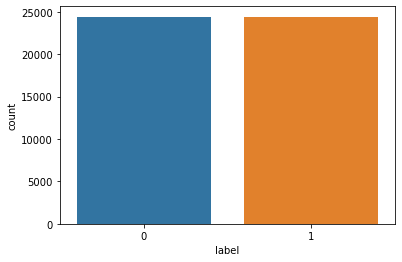

In [135]:
sns.countplot(y_res)
plt.show()

## Finding Best Random State

In [136]:
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)     

Best accuracy is 0.7519797924631348 on Random_state 427


## Train Test Split

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34176, 32), (14648, 32), (34176,), (14648,))

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=427)

In [139]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('For',m,':')
    print('------------------------------------------')
    print('Accuracy Score')
    print(accuracy_score(y_test,predm))
    print('Confusion matrix')
    print(confusion_matrix(y_test,predm))
    print('Classification Report')
    print(classification_report(y_test,predm))
    print('\n')

For LogisticRegression() :
------------------------------------------
Accuracy Score
0.7519797924631348
Confusion matrix
[[4986 2267]
 [1366 6029]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      7253
           1       0.73      0.82      0.77      7395

    accuracy                           0.75     14648
   macro avg       0.76      0.75      0.75     14648
weighted avg       0.76      0.75      0.75     14648



For DecisionTreeClassifier() :
------------------------------------------
Accuracy Score
0.7622883670125614
Confusion matrix
[[5533 1720]
 [1762 5633]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      7253
           1       0.77      0.76      0.76      7395

    accuracy                           0.76     14648
   macro avg       0.76      0.76      0.76     14648
weighted avg       0.76      0.76      0.76     14648



## AUC-ROC curve

In [140]:
from sklearn.metrics import roc_curve,roc_auc_score

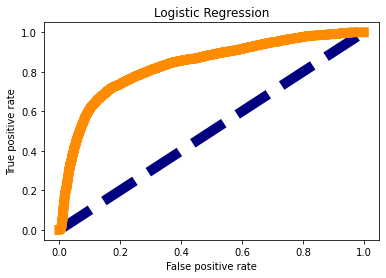

auc score 0.7513601375644892


In [141]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,lr.predict(x_test)) 
print("auc score",auc_score)

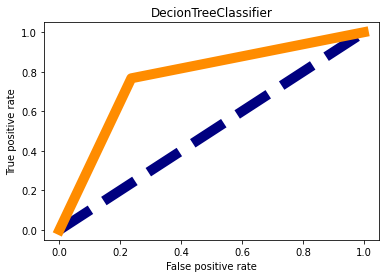

auc score 0.765413299870693


In [142]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecionTreeClassifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test)) 
print("auc score",auc_score)

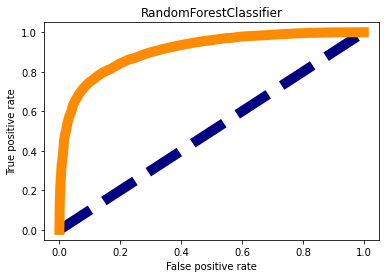

auc score 0.8255083369013704


In [143]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test)) 
print("auc score",auc_score)

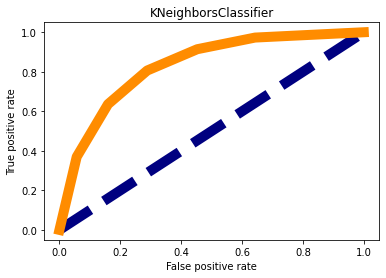

auc score 0.7589616364476539


In [144]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred_prob=kn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score=roc_auc_score(y_test,kn.predict(x_test)) 
print("auc score",auc_score)

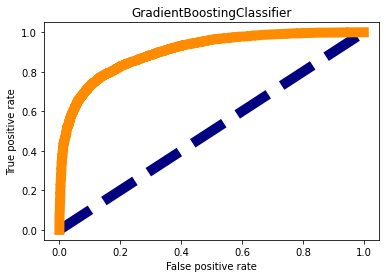

auc score 0.8158689691901521


In [145]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.plot(fpr,tpr,label='RandomForestClassifier',color='darkorange',lw=10)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score=roc_auc_score(y_test,gb.predict(x_test)) 
print("auc score",auc_score)

## Cross Validation

In [146]:
for m in model:
    scr=cross_val_score(m,x_res,y_res,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score',scr)
    print('Cross validation score',scr.mean())
    print('Standard deviation',scr.std())
    print('\n')

Cross validation score of LogisticRegression() is:
Score [0.58576549 0.76579621 0.73230927 0.72114695 0.61542401]
Cross validation score 0.6840883855403288
Standard deviation 0.07036611201295624


Cross validation score of DecisionTreeClassifier() is:
Score [0.61515617 0.75719406 0.75760369 0.74613415 0.69940598]
Cross validation score 0.7150988101583442
Standard deviation 0.05436297141162773


Cross validation score of RandomForestClassifier() is:
Score [0.58648233 0.80706605 0.81024066 0.81024066 0.73146252]
Cross validation score 0.7490984426526442
Standard deviation 0.08670871762574857


Cross validation score of KNeighborsClassifier() is:
Score [0.49626216 0.6562212  0.69953917 0.74818228 0.73637853]
Cross validation score 0.667316669299199
Standard deviation 0.09135626153432987


Cross validation score of GradientBoostingClassifier() is:
Score [0.72575525 0.82754736 0.79979519 0.80061444 0.73115526]
Cross validation score 0.7769735003638348
Standard deviation 0.04089024103298826


Our Best model is Random Forest Classifier,since the difference between the accuracy score and cross validation score is minimum for this model.

## Hyper Parameter tuning

In [148]:
#Parameter list to pass in GridSearchCV
parameters={'criterion':['gini','entropy'],'max_depth':[1,10],'n_estimators':[1,100],'max_features':['auto','sqrt','log2'],'class_weight':['balanced','balanced_subsample']}

In [149]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [150]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [151]:
GCV.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [152]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [153]:
accuracy_score(y_test,GCV_pred)

0.8118514472965592

## Saving The Model

In [154]:
import pickle
filename='Micro_Credit.pkl'
pickle.dump(GCV.best_estimator_,open('Micro_Credit.pkl','wb'))

## Conclusion

In [155]:
loaded_model=pickle.load(open('Micro_Credit.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8118514472965592


In [156]:
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_con=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [157]:
df_con

Original  Predicted
0             0          0
1             0          0
2             1          1
3             1          0
4             1          1
...         ...        ...
14643         0          0
14644         1          1
14645         0          1
14646         1          1
14647         0          0

[14648 rows x 2 columns]